# library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# preprocessing


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1 = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/last quera project/time_cleaned.xlsx'))
df2 = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/last quera project/wow_data_cleaned.xlsx') )

In [4]:
df1.info()
df1 = df1.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'], axis=1)
df1.rename(columns={'headline':'Header' , "description":'Body' , "label":'Label'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28516 entries, 0 to 28515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.2  28516 non-null  int64 
 1   Unnamed: 0.1  28516 non-null  int64 
 2   Unnamed: 0    28516 non-null  int64 
 3   headline      28515 non-null  object
 4   description   28516 non-null  object
 5   label         28516 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [5]:
df2.info()
df2 = df2.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
df2.rename(columns={'Headlines': 'Header', 'Descriptions': 'Body', 'Labels': 'Label'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1150 non-null   int64 
 1   Unnamed: 0    1150 non-null   int64 
 2   Headlines     1149 non-null   object
 3   Descriptions  1150 non-null   object
 4   Labels        1150 non-null   object
dtypes: int64(2), object(3)
memory usage: 45.0+ KB


In [6]:
df1['Label'].value_counts()

Label
Politics    8379
Tech        8281
Business    8256
Sport       3600
Name: count, dtype: int64

In [7]:
df2['Label'].value_counts()

Label
Sport    1150
Name: count, dtype: int64

In [8]:
df = pd.concat([df1,df2], axis=0)

In [9]:
df['Label'].value_counts()

Label
Politics    8379
Tech        8281
Business    8256
Sport       4750
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29666 entries, 0 to 1149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Header  29664 non-null  object
 1   Body    29666 non-null  object
 2   Label   29666 non-null  object
dtypes: object(3)
memory usage: 927.1+ KB


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29664 entries, 0 to 1149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Header  29664 non-null  object
 1   Body    29664 non-null  object
 2   Label   29664 non-null  object
dtypes: object(3)
memory usage: 927.0+ KB


In [13]:
df['Label'].value_counts()

Label
Politics    8378
Tech        8281
Business    8256
Sport       4749
Name: count, dtype: int64

<Axes: xlabel='Label'>

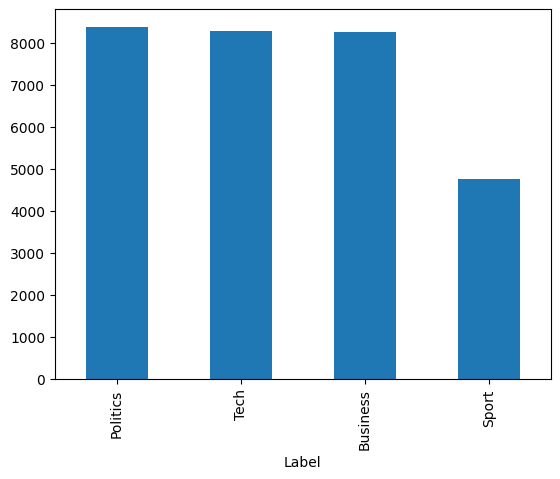

In [14]:
df['Label'].value_counts().plot.bar()


In [15]:
df.head()

,Header,Body,Label
0,Sam Bankman-Fried Faces 25 Years in Jail,"Sam Bankman-Fried, the former billionaire who ...",Business
1,Sam Bankman-Fried to be Sentenced for Defraudi...,Former crypto mogul Sam Bankman-Fried faces th...,Business
2,India’s Income Inequality Is Now Worse Than Un...,A new study from the World Inequality Lab find...,Business
3,Trump's Social Media Company Soars Nearly 50% ...,Shares of Donald Trump’s social media company ...,Business
4,How Is Trump's New Firm Worth Billions?,"On the cusp of a financial crisis, Donald Trum...",Business


#LSTM

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Input, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from tensorflow.keras.optimizers import Adam,SGD

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29664 entries, 0 to 1149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Header  29664 non-null  object
 1   Body    29664 non-null  object
 2   Label   29664 non-null  object
dtypes: object(3)
memory usage: 927.0+ KB


In [18]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [19]:
# prepare train data
df_train['CONTEXT'] = df_train['Header'] + ". " + df_train['Body']
# one-hot-encoding
label_dummies = pd.get_dummies(df_train['Label'], prefix='Label').astype(int)
df_train = pd.concat([df_train, label_dummies], axis=1)
df_train.drop(['Header','Body','Label'], axis=1, inplace=True)
df_train.info()


# prepare validation data
df_val['CONTEXT'] = df_val['Header'] + ". " + df_val['Body']
label_dummies = pd.get_dummies(df_val['Label'], prefix='Label').astype(int)
df_val = pd.concat([df_val, label_dummies], axis=1)
df_val.drop(['Header','Body','Label'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 23731 entries, 6620 to 23655
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CONTEXT         23731 non-null  object
 1   Label_Business  23731 non-null  int64 
 2   Label_Politics  23731 non-null  int64 
 3   Label_Sport     23731 non-null  int64 
 4   Label_Tech      23731 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ MB


In [20]:
X_train=df_train["CONTEXT"]
y_train=df_train.drop("CONTEXT",axis=1)

X_val=df_val["CONTEXT"]
y_val=df_val.drop("CONTEXT",axis=1)

In [21]:
# y_train

In [22]:
max_len = 512
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 1000

In [75]:
tokenizer1 = Tokenizer(num_words = vocab_size,
                      char_level = False,
                      oov_token = oov_tok)
tokenizer1.fit_on_texts(X_train)

In [24]:
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

167129

In [25]:
training_sequences = tokenizer.texts_to_sequences(X_train)

In [26]:
# num_tokens_per_instance = [len(sequence) for sequence in training_sequences]
# min(num_tokens_per_instance)

In [27]:
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [28]:
# num_tokens_per_instance = [len(sequence) for sequence in training_padded]
# max(num_tokens_per_instance)

In [29]:
testing_sequences = tokenizer1.texts_to_sequences(X_val)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [30]:
# Model
embedding_dim = 16
n_lstm = 128
drop_lstm = 0.2

model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(4, activation='softmax'))

In [31]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 16)           16000     
                                                                 
 spatial_dropout1d (Spatial  (None, 512, 16)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               74240     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 90756 (354.52 KB)
Trainable params: 90756 (354.52 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [32]:
model1.compile(loss = 'categorical_crossentropy', optimizer =Adam(learning_rate=0.001), metrics = ['accuracy'])

In [33]:
num_epochs = 100
early_stop = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=7)
history = model1.fit(training_padded,
                     y_train,
                     epochs=num_epochs,
                     validation_split=0.2,
                     callbacks=[early_stop],
                     verbose=2)

Epoch 1/100
594/594 - 35s - loss: 1.2901 - accuracy: 0.3759 - val_loss: 1.2782 - val_accuracy: 0.3941 - 35s/epoch - 59ms/step
Epoch 2/100
594/594 - 16s - loss: 1.2551 - accuracy: 0.4070 - val_loss: 1.3402 - val_accuracy: 0.2949 - 16s/epoch - 27ms/step
Epoch 3/100
594/594 - 14s - loss: 1.1828 - accuracy: 0.4447 - val_loss: 1.0454 - val_accuracy: 0.4913 - 14s/epoch - 23ms/step
Epoch 4/100
594/594 - 13s - loss: 1.1068 - accuracy: 0.4875 - val_loss: 1.0302 - val_accuracy: 0.5001 - 13s/epoch - 22ms/step
Epoch 5/100
594/594 - 13s - loss: 1.0820 - accuracy: 0.5035 - val_loss: 1.1063 - val_accuracy: 0.5102 - 13s/epoch - 21ms/step
Epoch 6/100
594/594 - 12s - loss: 1.0838 - accuracy: 0.5094 - val_loss: 1.1137 - val_accuracy: 0.5277 - 12s/epoch - 20ms/step
Epoch 7/100
594/594 - 12s - loss: 1.0773 - accuracy: 0.4969 - val_loss: 0.9362 - val_accuracy: 0.5681 - 12s/epoch - 21ms/step
Epoch 8/100
594/594 - 13s - loss: 0.9838 - accuracy: 0.5359 - val_loss: 0.9151 - val_accuracy: 0.5559 - 13s/epoch - 23

In [34]:
import numpy as np
y_val_true=np.argmax(y_val,axis=1)

In [35]:
y_pred=model1.predict(testing_padded)


186/186 [==============================] - 2s 8ms/step


In [36]:
y_pred=np.argmax(y_pred,axis=1)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,precision_score,recall_score

print("accuracy for validation data:",accuracy_score(y_val_true,y_pred))
confusion_matrix(y_val_true,y_pred)
print(classification_report(y_val_true,y_pred))



accuracy for validation data: 0.7906623967638632
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1621
           1       0.91      0.93      0.92      1695
           2       0.90      0.88      0.89       912
           3       0.75      0.65      0.70      1705

    accuracy                           0.79      5933
   macro avg       0.81      0.80      0.80      5933
weighted avg       0.79      0.79      0.79      5933



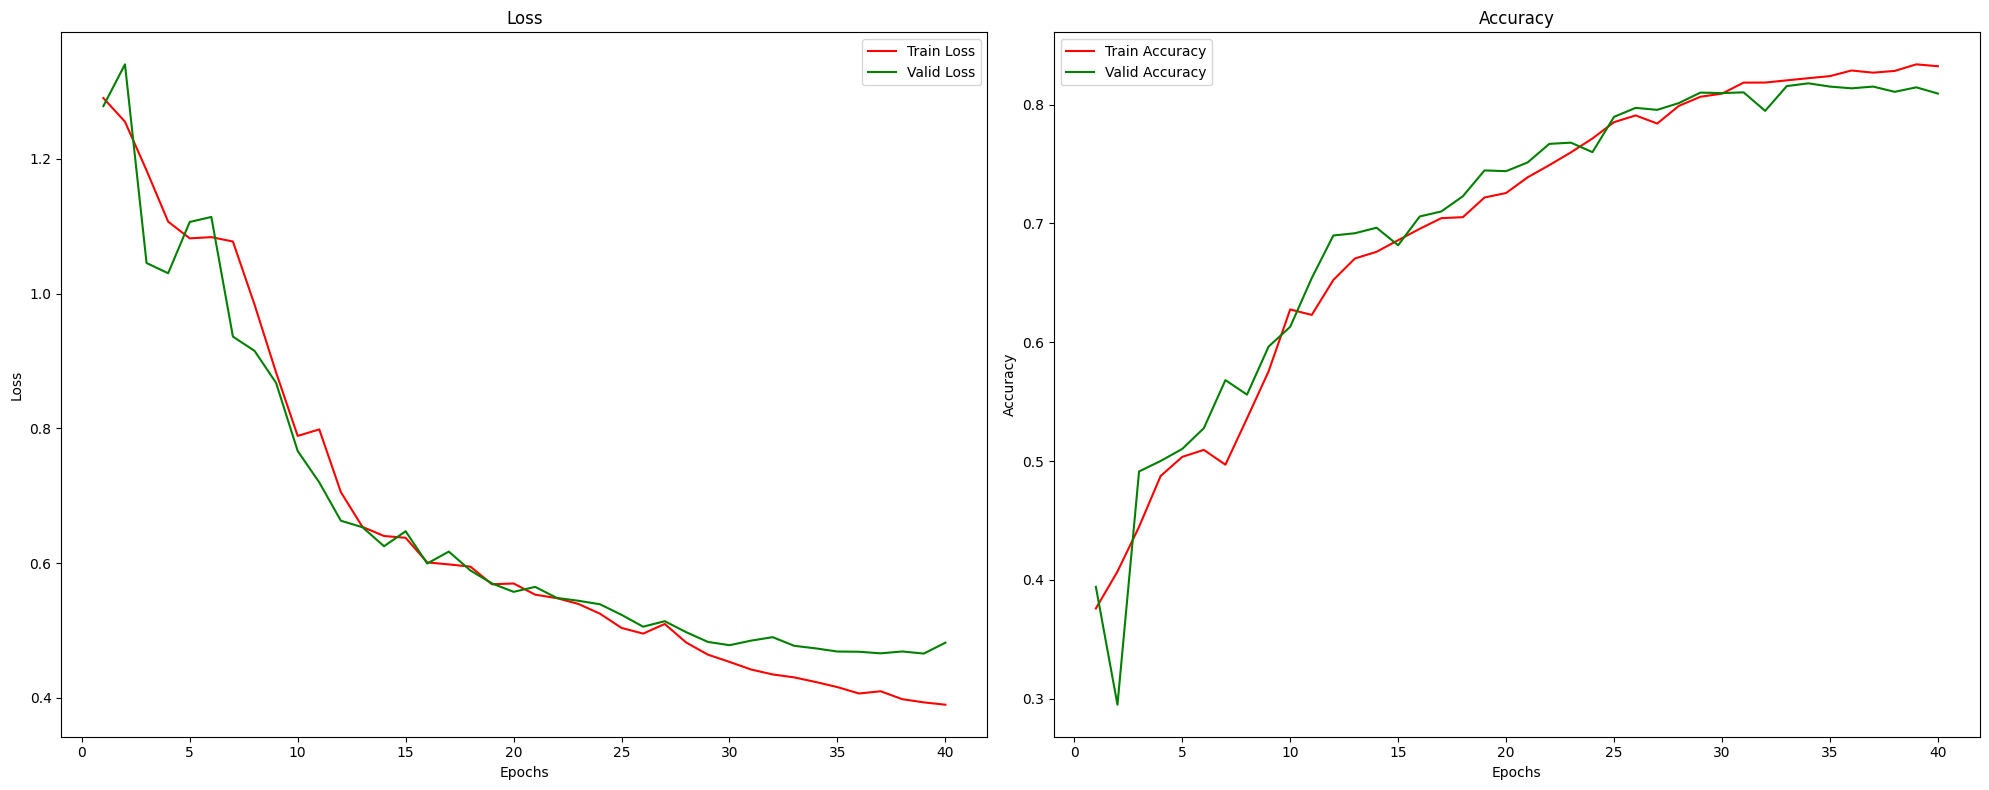

In [38]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [39]:
text=["""Senator Tim Kaine, a former vice-presidential nominee and leading foreign policy voice in the Democratic party, has said Joe Biden now understands that Benjamin Netanyahu “played” him during the early months of the war in Gaza but “that ain’t going to happen any more”.

In an interview with the Guardian on Tuesday, Kaine accused the prime minister of making Israel “dramatically less safe” and hurting its longstanding relationship with the US, and said the US president had come to realise the limits of his influence.

The Democratic senator for Virginia is best known nationally as Hillary Clinton’s running mate in the 2016 presidential election, a race they lost to Republicans Donald Trump and Mike Pence. The Biden ally is a member of the Senate foreign relations and armed services committees.

Kaine has repeatedly reiterated his backing for Israel’s right to defend itself against Hamas following the terrorist attack six months ago that killed 1,200 people, mostly civilians, and took about 250 people hostage. But he has joined other Democrats in expressing growing consternation over a hardline military response that has killed more than 33,000 Palestinians, according to the Gaza health ministry, and spurred a looming famine.

Biden embraced Netanyahu early in the conflict but had little to show for it as Israel continued to rain bombs on Gaza, causing mass displacement, threats of famine and disease and, last week, the deaths of seven World Central Kitchen aid workers. Protesters have condemned Biden for miscalculating the extent of his sway over Netanyahu."""]

text_seq = tokenizer.texts_to_sequences(text)
text_padded = pad_sequences(text_seq,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [40]:
y_pred_text=model1.predict(text_padded)
y_pred_text

1/1 [==============================] - 0s 40ms/step


array([[1.2097409e-03, 9.9834669e-01, 2.6877501e-04, 1.7477204e-04]],
      dtype=float32)

#testing model1 on okite data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
okite_data = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/last quera project/okite_data_cleaned.xlsx'))

In [ ]:
okite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4418 non-null   int64 
 1   headline     4418 non-null   object
 2   description  4418 non-null   object
 3   label        4418 non-null   object
 4   Label_split  4418 non-null   object
dtypes: int64(1), object(4)
memory usage: 172.7+ KB


In [ ]:
okite_data["CONTEXT"]=okite_data["headline"]+". "+okite_data["description"]

okite_data.drop(["Unnamed: 0","Label_split","headline","description"],axis=1,inplace=True)
okite_data.head()

,label,CONTEXT
0,Sport,"Uefa Opens Proceedings against Barcelona, Juve..."
1,Business,Amazon Blames Inflation as It Increases Cost o...
2,Politics,Nigeria’s Parliament Passes Amended Electoral ...
3,Politics,South Africa Calls For Calm as Electoral Refor...
4,Sport,Guardiola To Leave Man City When Contract Expi...


In [ ]:

# one-hot-encoding
label_dummies = pd.get_dummies(okite_data['label'], prefix='Label').astype(int)
okite_data_clean = pd.concat([okite_data, label_dummies], axis=1)
okite_data_clean.drop(['label'], axis=1, inplace=True)
okite_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CONTEXT         4418 non-null   object
 1   Label_Business  4418 non-null   int64 
 2   Label_Politics  4418 non-null   int64 
 3   Label_Sport     4418 non-null   int64 
 4   Label_Tech      4418 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 172.7+ KB


In [ ]:
okite_x=okite_data_clean["CONTEXT"]
okite_y=okite_data_clean.drop("CONTEXT",axis=1)

In [ ]:
okite_sequences = tokenizer.texts_to_sequences(okite_x)
okite_padded = pad_sequences(okite_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [ ]:
okite_y_pred=model1.predict(okite_padded)
okite_y_pred=np.argmax(okite_y_pred,axis=1)

139/139 [==============================] - 2s 13ms/step


In [ ]:
okite_y_true=np.argmax(okite_y,axis=1)

In [ ]:
print("accuracy for okite data: ",accuracy_score(okite_y_true,okite_y_pred))
print(classification_report(okite_y_true,okite_y_pred))

accuracy for okite data:  0.7039384336803983
              precision    recall  f1-score   support

           0       0.73      0.58      0.65      1492
           1       0.65      0.83      0.73      1263
           2       0.78      0.81      0.79      1323
           3       0.49      0.41      0.45       340

    accuracy                           0.70      4418
   macro avg       0.66      0.66      0.65      4418
weighted avg       0.71      0.70      0.70      4418



#testing model2 on okite data

In [ ]:
okite_y_pred=model2.predict(okite_padded)
okite_y_pred=np.argmax(okite_y_pred,axis=1)

139/139 [==============================] - 2s 14ms/step


In [ ]:
okite_y_true=np.argmax(okite_y,axis=1)

In [ ]:
print("accuracy for okite data: ",accuracy_score(okite_y_true,okite_y_pred))
print(classification_report(okite_y_true,okite_y_pred))

accuracy for okite data:  0.5153915799004074
              precision    recall  f1-score   support

           0       0.72      0.45      0.56      1492
           1       0.89      0.34      0.49      1263
           2       0.67      0.68      0.68      1323
           3       0.17      0.81      0.27       340

    accuracy                           0.52      4418
   macro avg       0.61      0.57      0.50      4418
weighted avg       0.71      0.52      0.55      4418



# balanced +LSTM

In [ ]:
df.head()

,Header,Body,Label
0,Sam Bankman-Fried Faces 25 Years in Jail,"Sam Bankman-Fried, the former billionaire who ...",Business
1,Sam Bankman-Fried to be Sentenced for Defraudi...,Former crypto mogul Sam Bankman-Fried faces th...,Business
2,India’s Income Inequality Is Now Worse Than Un...,A new study from the World Inequality Lab find...,Business
3,Trump's Social Media Company Soars Nearly 50% ...,Shares of Donald Trump’s social media company ...,Business
4,How Is Trump's New Firm Worth Billions?,"On the cusp of a financial crisis, Donald Trum...",Business


<Axes: xlabel='Label'>

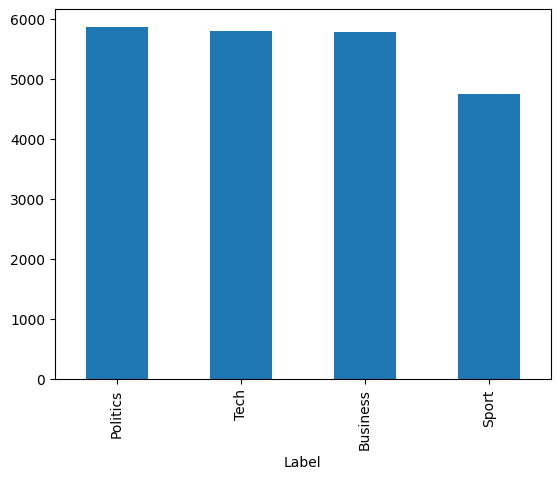

In [ ]:
categories_to_reduce = ['Business', 'Tech', 'Politics']

# Separate the data
df_to_reduce = df[df['Label'].isin(categories_to_reduce)]
df_remain = df[~df['Label'].isin(categories_to_reduce)]

# Drop 30% of samples from specified categories
reduced_dfs = []
for category in categories_to_reduce:
    df_category = df_to_reduce[df_to_reduce['Label'] == category]
    reduced_count = int(len(df_category) * 0.7)  # Keeping 70% means dropping 30%
    df_reduced = df_category.sample(n=reduced_count)
    reduced_dfs.append(df_reduced)

# Concatenate the reduced datasets with the untouched dataset
df_final = pd.concat([pd.concat(reduced_dfs), df_remain])

# Shuffle the final DataFrame
df_final = df_final.sample(frac=1).reset_index(drop=True)

df_final['Label'].value_counts().plot.bar()

In [ ]:
df_train.shape,df_val.shape

((17750, 5), (4438, 5))

In [ ]:
df_train, df_val = train_test_split(df_final, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# prepare train data
df_train['CONTEXT'] = df_train['Header'] + ". " + df_train['Body']
# one-hot-encoding
label_dummies = pd.get_dummies(df_train['Label'], prefix='Label').astype(int)
df_train = pd.concat([df_train, label_dummies], axis=1)
df_train.drop(['Header','Body','Label'], axis=1, inplace=True)
df_train.info()


# prepare validation data
df_val['CONTEXT'] = df_val['Header'] + ". " + df_val['Body']
label_dummies = pd.get_dummies(df_val['Label'], prefix='Label').astype(int)
df_val = pd.concat([df_val, label_dummies], axis=1)
df_val.drop(['Header','Body','Label'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 17750 entries, 11813 to 15795
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CONTEXT         17750 non-null  object
 1   Label_Business  17750 non-null  int64 
 2   Label_Politics  17750 non-null  int64 
 3   Label_Sport     17750 non-null  int64 
 4   Label_Tech      17750 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 832.0+ KB


In [ ]:
X_train=df_train["CONTEXT"]
y_train=df_train.drop("CONTEXT",axis=1)

X_val=df_val["CONTEXT"]
y_val=df_val.drop("CONTEXT",axis=1)

In [ ]:
max_len = 512
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size,
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [ ]:
training_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(X_val)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [ ]:
# Model
embedding_dim = 16
n_lstm = 128
drop_lstm = 0.2

model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(SpatialDropout1D(drop_lstm))
model1.add(LSTM(n_lstm, return_sequences=False))
model1.add(Dropout(drop_lstm))
model1.add(Dense(4, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 512, 16)           8000      
                                                                 
 spatial_dropout1d_1 (Spati  (None, 512, 16)           0         
 alDropout1D)                                                    
                                                                 
 lstm_1 (LSTM)               (None, 128)               74240     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 82756 (323.27 KB)
Trainable params: 82756 (323.27 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model1.compile(loss = 'categorical_crossentropy', optimizer =Adam(learning_rate=0.001), metrics = ['accuracy'])

In [ ]:
num_epochs = 100
early_stop = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=7)
history = model1.fit(training_padded,
                     y_train,
                     epochs=num_epochs,
                     validation_split=0.2,
                     callbacks=[early_stop],
                     verbose=2)

Epoch 1/100
444/444 - 16s - loss: 1.3530 - accuracy: 0.3164 - val_loss: 1.1239 - val_accuracy: 0.4648 - 16s/epoch - 37ms/step
Epoch 2/100
444/444 - 10s - loss: 1.2129 - accuracy: 0.4067 - val_loss: 1.0602 - val_accuracy: 0.4997 - 10s/epoch - 22ms/step
Epoch 3/100
444/444 - 10s - loss: 1.2690 - accuracy: 0.3763 - val_loss: 1.1051 - val_accuracy: 0.4777 - 10s/epoch - 23ms/step
Epoch 4/100
444/444 - 10s - loss: 1.0925 - accuracy: 0.4708 - val_loss: 1.0616 - val_accuracy: 0.4952 - 10s/epoch - 23ms/step
Epoch 5/100
444/444 - 13s - loss: 1.1614 - accuracy: 0.4385 - val_loss: 1.3828 - val_accuracy: 0.2546 - 13s/epoch - 29ms/step
Epoch 6/100
444/444 - 9s - loss: 1.3830 - accuracy: 0.2794 - val_loss: 1.3753 - val_accuracy: 0.2924 - 9s/epoch - 20ms/step
Epoch 7/100
444/444 - 9s - loss: 1.2079 - accuracy: 0.3923 - val_loss: 0.9729 - val_accuracy: 0.5225 - 9s/epoch - 20ms/step
Epoch 8/100
444/444 - 10s - loss: 0.9204 - accuracy: 0.5751 - val_loss: 0.7884 - val_accuracy: 0.6456 - 10s/epoch - 21ms/s

In [ ]:
import numpy as np
y_val_true=np.argmax(y_val,axis=1)

In [ ]:
y_pred=model1.predict(testing_padded)


139/139 [==============================] - 2s 8ms/step


In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,precision_score,recall_score

# print("f1 score is: ",f1_score(y_val_true,y_pred,average=None))
# print("precision:",precision_score(y_val_true,y_pred,average=None))
# print("recall:",recall_score(y_val_true,y_pred,average=None))

print("accuracy for validation data:",accuracy_score(y_val_true,y_pred))
confusion_matrix(y_val_true,y_pred)
print(classification_report(y_val_true,y_pred))



accuracy for validation data: 0.6505182514646237
              precision    recall  f1-score   support

           0       0.46      0.86      0.60      1153
           1       0.92      0.85      0.89      1199
           2       0.78      0.84      0.81       924
           3       0.61      0.08      0.15      1162

    accuracy                           0.65      4438
   macro avg       0.69      0.66      0.61      4438
weighted avg       0.69      0.65      0.60      4438



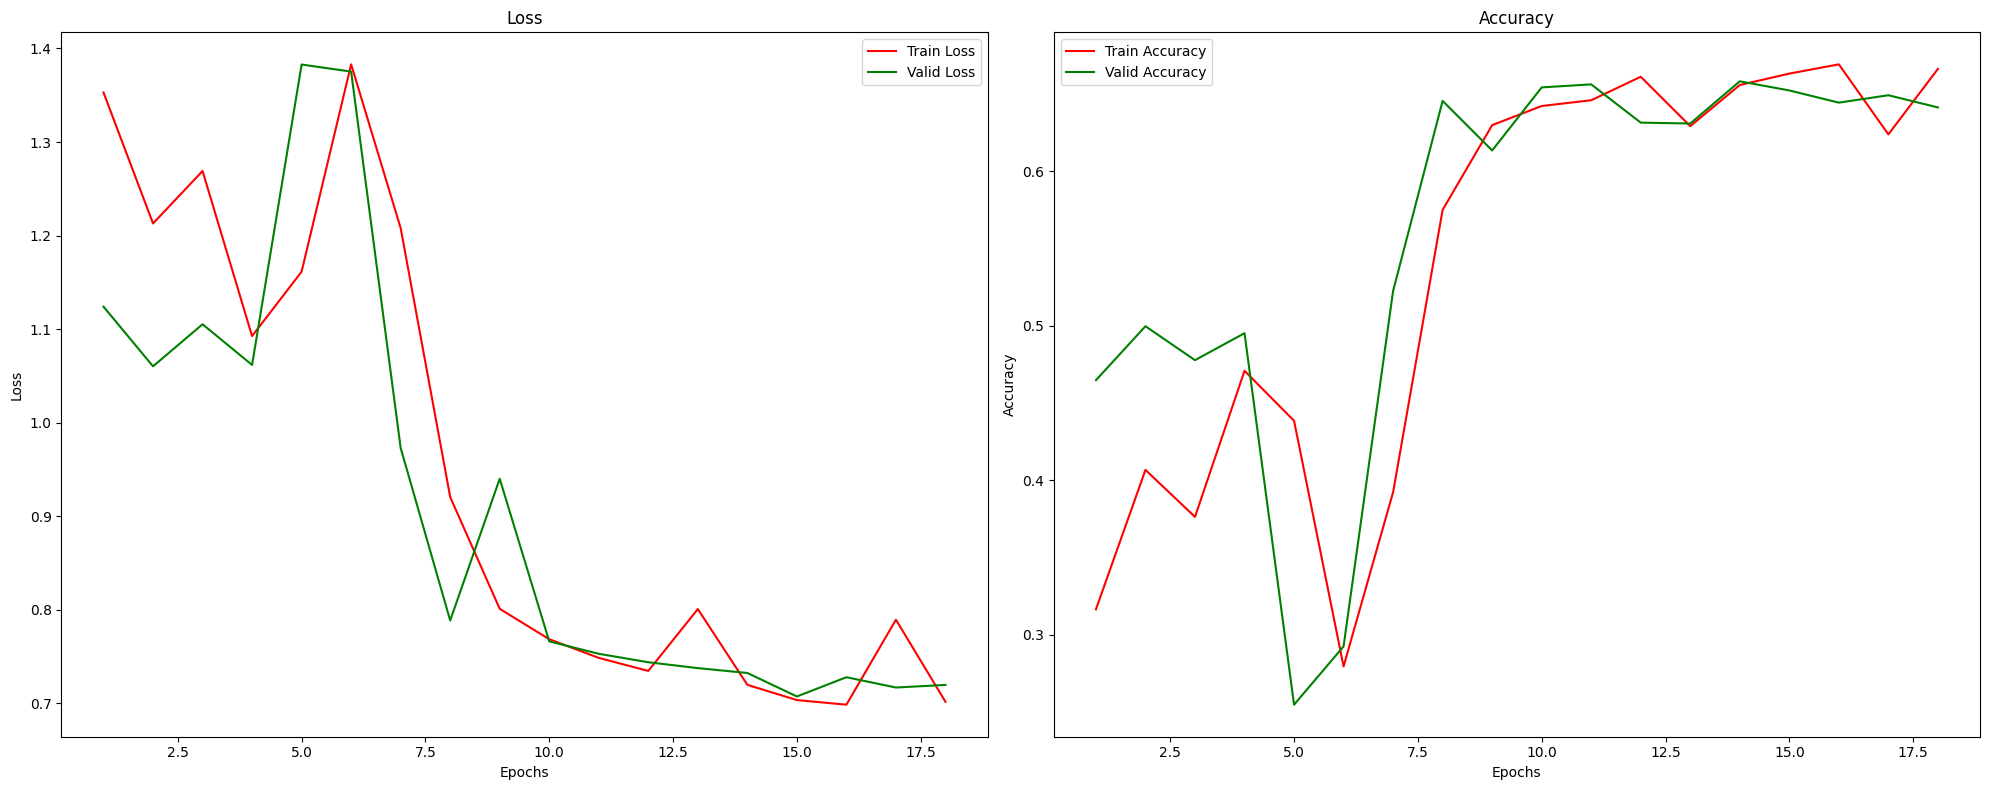

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# BiLSTM

In [41]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [42]:
# prepare train data
df_train['CONTEXT'] = df_train['Header'] + ". " + df_train['Body']
# one-hot-encoding
label_dummies = pd.get_dummies(df_train['Label'], prefix='Label').astype(int)
df_train = pd.concat([df_train, label_dummies], axis=1)
df_train.drop(['Header','Body','Label'], axis=1, inplace=True)
df_train.info()


# prepare validation data
df_val['CONTEXT'] = df_val['Header'] + ". " + df_val['Body']
label_dummies = pd.get_dummies(df_val['Label'], prefix='Label').astype(int)
df_val = pd.concat([df_val, label_dummies], axis=1)
df_val.drop(['Header','Body','Label'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 23731 entries, 6620 to 23655
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CONTEXT         23731 non-null  object
 1   Label_Business  23731 non-null  int64 
 2   Label_Politics  23731 non-null  int64 
 3   Label_Sport     23731 non-null  int64 
 4   Label_Tech      23731 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ MB


In [43]:
X_train=df_train["CONTEXT"]
y_train=df_train.drop("CONTEXT",axis=1)

X_val=df_val["CONTEXT"]
y_val=df_val.drop("CONTEXT",axis=1)

In [44]:
max_len = 512
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 10000

In [45]:
tokenizer = Tokenizer(num_words = vocab_size,
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [46]:
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)

In [47]:
testing_sequences = tokenizer.texts_to_sequences(X_val)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)

In [48]:
# Model
embedding_dim = 16
n_lstm = 128
drop_lstm = 0.2

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model2.add(SpatialDropout1D(drop_lstm))
model2.add(Bidirectional(LSTM(units=n_lstm, return_sequences=False)))
model2.add(Dropout(drop_lstm))
model2.add(Dense(4, activation='softmax'))

In [49]:
model2.compile(loss = 'categorical_crossentropy', optimizer =Adam(learning_rate=0.001), metrics = ['accuracy'])

In [50]:
num_epochs = 100
early_stop = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=7)
history = model2.fit(training_padded,
                     y_train,
                     epochs=num_epochs,
                     validation_split=0.2,
                     callbacks=[early_stop],
                     verbose=2)

Epoch 1/100
594/594 - 93s - loss: 0.8424 - accuracy: 0.6039 - val_loss: 0.5975 - val_accuracy: 0.7312 - 93s/epoch - 157ms/step
Epoch 2/100
594/594 - 44s - loss: 0.5372 - accuracy: 0.7684 - val_loss: 0.5863 - val_accuracy: 0.7493 - 44s/epoch - 75ms/step
Epoch 3/100
594/594 - 36s - loss: 0.4335 - accuracy: 0.8229 - val_loss: 0.4737 - val_accuracy: 0.8096 - 36s/epoch - 61ms/step
Epoch 4/100
594/594 - 28s - loss: 0.3639 - accuracy: 0.8513 - val_loss: 0.4895 - val_accuracy: 0.8039 - 28s/epoch - 47ms/step
Epoch 5/100
594/594 - 28s - loss: 0.3164 - accuracy: 0.8692 - val_loss: 0.5073 - val_accuracy: 0.8094 - 28s/epoch - 47ms/step
Epoch 6/100
594/594 - 25s - loss: 0.3026 - accuracy: 0.8750 - val_loss: 0.5321 - val_accuracy: 0.7940 - 25s/epoch - 43ms/step
Epoch 7/100
594/594 - 25s - loss: 0.2657 - accuracy: 0.8888 - val_loss: 0.5900 - val_accuracy: 0.7775 - 25s/epoch - 42ms/step
Epoch 8/100
594/594 - 24s - loss: 0.2498 - accuracy: 0.8928 - val_loss: 0.5556 - val_accuracy: 0.7851 - 24s/epoch - 4

In [51]:
import numpy as np
y_val_true=np.argmax(y_val,axis=1)

In [52]:
y_pred=model2.predict(testing_padded)


186/186 [==============================] - 3s 14ms/step


In [53]:
y_pred=np.argmax(y_pred,axis=1)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,precision_score,recall_score

print("accuracy for validation data:",accuracy_score(y_val_true,y_pred))
confusion_matrix(y_val_true,y_pred)
print(classification_report(y_val_true,y_pred))



accuracy for validation data: 0.7647058823529411
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      1621
           1       0.89      0.92      0.90      1695
           2       0.91      0.89      0.90       912
           3       0.69      0.67      0.68      1705

    accuracy                           0.76      5933
   macro avg       0.78      0.78      0.78      5933
weighted avg       0.76      0.76      0.76      5933



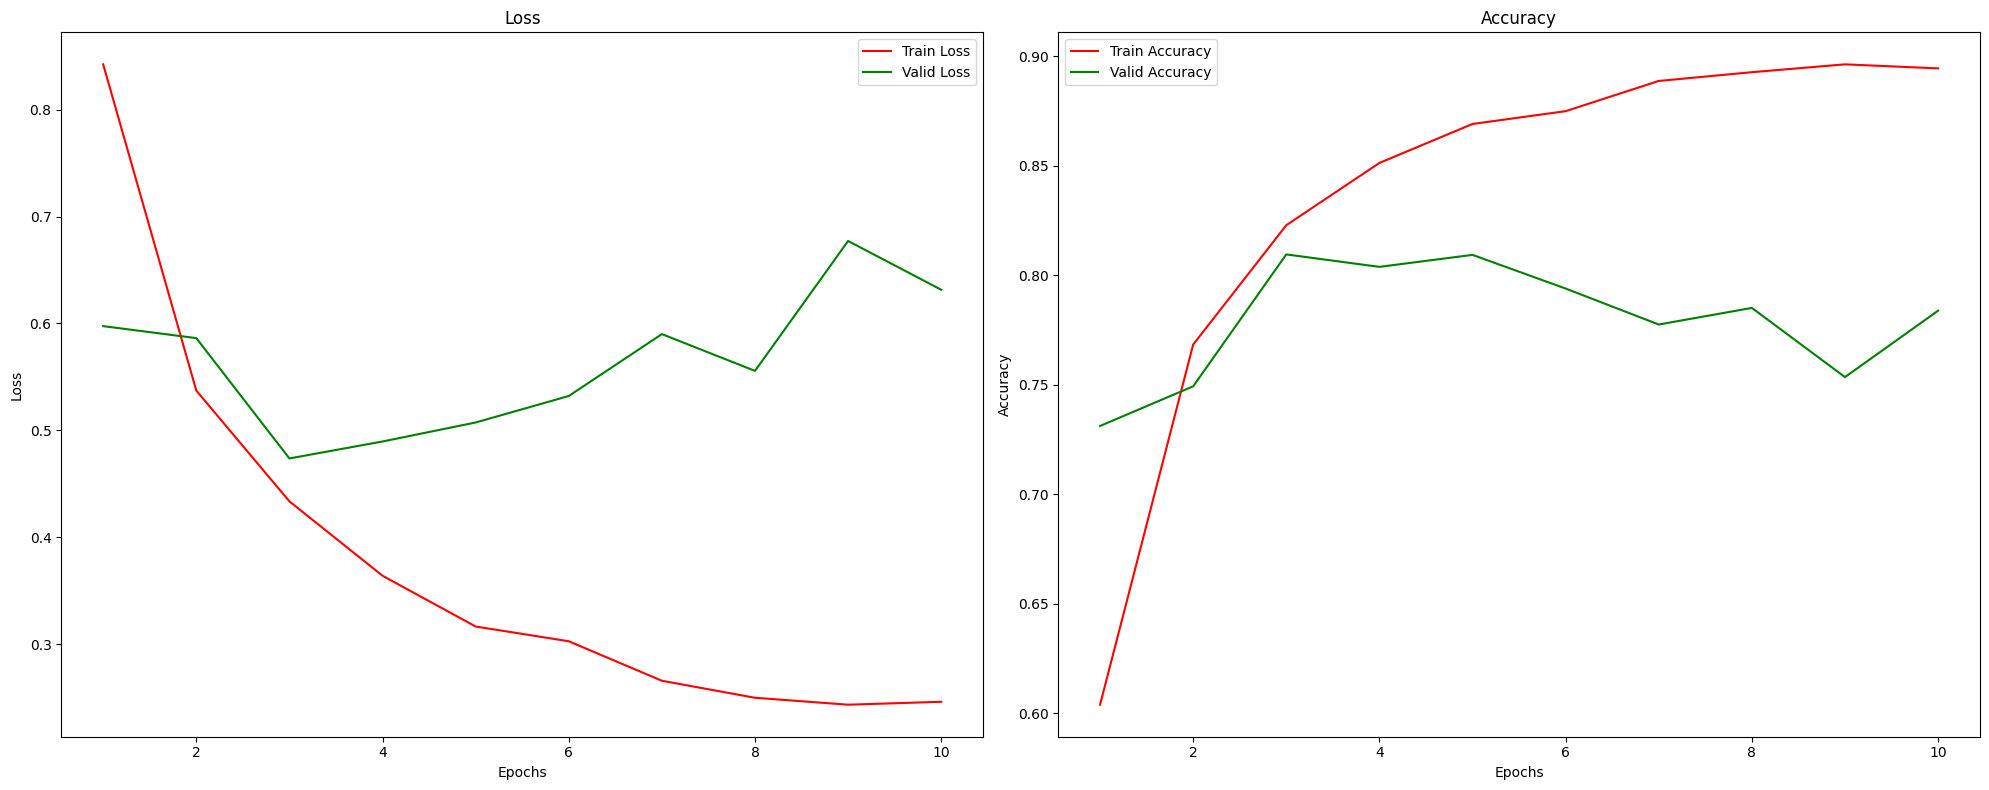

In [55]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

#deleting stopwords + preprocessing

In [56]:
df5=df.copy()
df5["CONTEXT"]=df5["Header"]+". "+df5["Body"]

In [57]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29664 entries, 0 to 1149
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Header   29664 non-null  object
 1   Body     29664 non-null  object
 2   Label    29664 non-null  object
 3   CONTEXT  29664 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [58]:
# df5.iloc[12,:]

In [141]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from each text in the DataFrame
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df5['CONTEXT_without_stopwords'] = df5['CONTEXT'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
df5=df5.drop(["Header","Body","CONTEXT"],axis=1)

In [61]:
df5.rename(columns={"CONTEXT_without_stopwords":"CONTEXT"},inplace=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29664 entries, 0 to 1149
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    29664 non-null  object
 1   CONTEXT  29664 non-null  object
dtypes: object(2)
memory usage: 695.2+ KB


#KNN

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [120]:
df_train, df_val = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [121]:
df_train["CONTEXT"]=df_train["Header"]+". "+df_train["Body"]
X_train=df_train["CONTEXT"]
y_train=df_train["Label"]

df_val["CONTEXT"]=df_val["Header"]+". "+df_val["Body"]
X_val=df_val["CONTEXT"]
y_val=df_val["Label"]

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train=le.fit_transform(y_train)
y_val=le.fit_transform(y_val)

In [127]:
from sklearn.decomposition import TruncatedSVD

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

svd = TruncatedSVD(n_components=1000)
X_train_svd = svd.fit_transform(X_train_tfidf)

X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_val_svd = svd.transform(X_val_tfidf)

In [128]:
X_train_tfidf.shape,X_train_svd.shape

((23731, 5000), (23731, 1000))

In [129]:
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_svd, y_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
y_pred = knn_model.predict(X_val_svd)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.64      0.61      1621
           1       0.89      0.90      0.90      1695
           2       0.92      0.83      0.87       912
           3       0.69      0.67      0.68      1705

    accuracy                           0.75      5933
   macro avg       0.77      0.76      0.77      5933
weighted avg       0.76      0.75      0.75      5933



#naive bayes

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [151]:
df_train, df_val = train_test_split(df5, test_size=0.2, random_state=42, shuffle=True)

In [152]:
X_train=df_train["CONTEXT"]
y_train=df_train["Label"]

X_val=df_val["CONTEXT"]
y_val=df_val["Label"]

In [153]:
le=LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

In [159]:
vectorizer_nb = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer_nb.fit_transform(X_train)
X_val_tfidf = vectorizer_nb.transform(X_val)

In [160]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_encoded)

MultinomialNB()

In [161]:
y_pred=nb_model.predict(X_val_tfidf)

In [162]:
print(classification_report(y_val_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1621
           1       0.92      0.95      0.93      1695
           2       0.93      0.93      0.93       912
           3       0.76      0.76      0.76      1705

    accuracy                           0.82      5933
   macro avg       0.83      0.84      0.83      5933
weighted avg       0.82      0.82      0.82      5933



In [163]:
# save model
import joblib

joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(vectorizer_nb, 'vectorizer_nb.pkl')

['vectorizer_nb.pkl']

#Test

In [92]:
test=pd.read_csv("/content/drive/MyDrive/last quera project/test_data.csv")

In [93]:
test["CONTEXT"]=test["Headline"]+". "+test["Description"]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     340 non-null    object
 1   Description  340 non-null    object
 2   CONTEXT      340 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [94]:
test['CONTEXT'] = test['CONTEXT'].apply(remove_stopwords)


In [95]:
X_test=test["CONTEXT"]

In [112]:
X_test_tfidf = vectorizer_nb.transform(X_test)

In [113]:
y_pred_nb=nb_model.predict(X_test_tfidf)

In [114]:
y_pred_nb


array([0, 2, 2, 3, 0, 1, 0, 3, 2, 1, 1, 3, 2, 1, 1, 0, 2, 2, 0, 2, 2, 3,
       2, 1, 0, 3, 2, 3, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 3, 1, 1, 1, 2, 2, 3, 0, 0, 1, 0,
       0, 3, 0, 2, 0, 1, 2, 1, 1, 0, 3, 2, 0, 2, 2, 2, 0, 3, 0, 2, 3, 2,
       2, 2, 1, 3, 2, 2, 0, 1, 0, 1, 0, 1, 3, 0, 1, 3, 0, 3, 0, 0, 1, 0,
       1, 3, 2, 2, 0, 2, 0, 1, 1, 2, 1, 0, 3, 3, 0, 3, 2, 0, 1, 3, 0, 2,
       1, 0, 0, 1, 3, 1, 3, 2, 3, 2, 1, 1, 3, 2, 3, 3, 1, 0, 3, 2, 1, 1,
       3, 2, 0, 2, 3, 0, 2, 1, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 1, 1, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 1, 2, 1, 3, 1, 3, 3,
       1, 1, 0, 0, 2, 0, 1, 1, 3, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0,
       3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 0, 3, 1, 2, 1, 1, 3, 0,
       2, 1, 2, 3, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 1, 1, 0, 2, 3, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 0, 0, 0, 1, 3,
       2, 1, 1, 1, 3, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0,

In [116]:
labels = {0: "Business",1: "Politics",2: "Sport",3: "Tech"}
final=pd.DataFrame({"predicted":y_pred_nb})
final["predicted"]=final["predicted"].apply(lambda x:labels[x])

In [118]:
final.to_csv("q2_submission.csv")

"Olympic Games Set Inspire Athletes Spectators Alike. Olympic Games promise showcase world's best athletes competing global stage, inspiring millions feats athleticism."

2